In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lux
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
dataset = pd.read_csv('Derma_after_LDA2D.csv')
dataset

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [35]:
dataset.isnull().sum()
print(dataset.isnull().sum())

LDA1     0
LDA2     0
class    0
dtype: int64



In [36]:
# iterating the columns 
for col in dataset.columns: 
    print(col)

LDA1
LDA2
class


In [37]:
X = dataset.iloc[:, 0:2].values
x = dataset.iloc[:, 0:2]
y = dataset.iloc[:, 2].values
y_name = dataset.iloc[:, 2:3]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (366, 2)
y shape: (366, 1)


In [38]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

LDA1
LDA2


Class:
class


In [39]:
dataset.corr

<bound method DataFrame.corr of >

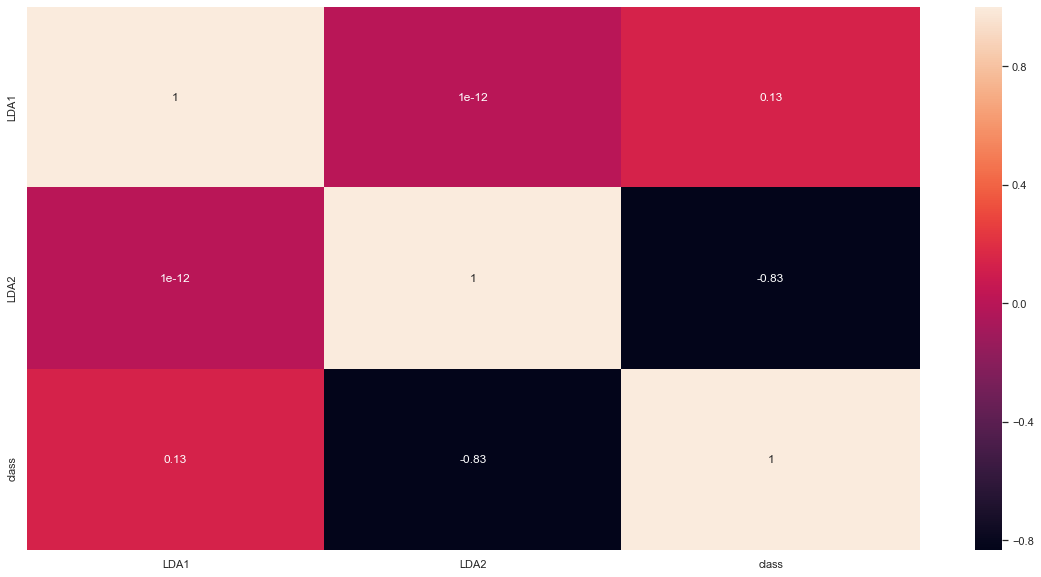

In [40]:
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [66]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [67]:
y_pred_knn = classifier_knn.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)


[[37  1  0  0  0  0]
 [ 1 12  0  7  1  0]
 [ 0  0 17  0  0  0]
 [ 0  3  0 10  0  0]
 [ 0  1  0  0 16  0]
 [ 0  0  0  0  0  4]]


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn, average='weighted')
re  = recall_score(y_test, y_pred_knn, average='weighted')
f1  = f1_score(y_test, y_pred_knn, average='weighted')
mc  = matthews_corrcoef(y_test, y_pred_knn)  

In [70]:
np.set_printoptions()
print("Akurasi =", ac)
print("Presisi =",pre)
print("Recall =", re)
print("F1 =", f1)
print("MCC =", mc)

Akurasi = 0.8727272727272727
Presisi = 0.8770053475935828
Recall = 0.8727272727272727
F1 = 0.8720893141945775
MCC = 0.8390379534377902


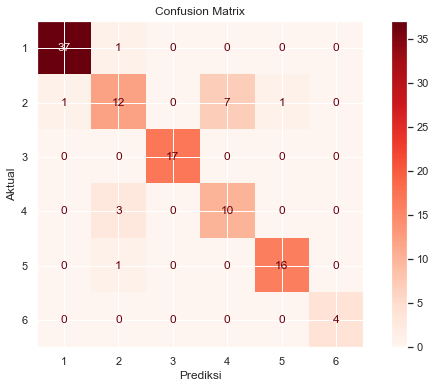

In [71]:
matrix = plot_confusion_matrix(classifier_knn, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.gcf().axes[0].tick_params
plt.gcf().axes[1].tick_params
plt.gcf().set_size_inches(10,6)
plt.show()

In [72]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [51]:
error

[0.14545454545454545,
 0.14545454545454545,
 0.14545454545454545,
 0.14545454545454545,
 0.12727272727272726,
 0.13636363636363635,
 0.11818181818181818,
 0.13636363636363635,
 0.18181818181818182,
 0.17272727272727273,
 0.15454545454545454,
 0.15454545454545454,
 0.16363636363636364,
 0.13636363636363635,
 0.17272727272727273,
 0.17272727272727273,
 0.17272727272727273,
 0.16363636363636364,
 0.16363636363636364,
 0.16363636363636364,
 0.18181818181818182,
 0.17272727272727273,
 0.16363636363636364,
 0.17272727272727273,
 0.17272727272727273,
 0.17272727272727273,
 0.17272727272727273,
 0.17272727272727273,
 0.17272727272727273,
 0.17272727272727273,
 0.17272727272727273,
 0.2,
 0.20909090909090908,
 0.20909090909090908,
 0.20909090909090908,
 0.20909090909090908,
 0.20909090909090908,
 0.20909090909090908,
 0.20909090909090908]

Text(0, 0.5, 'Error rata-rata')

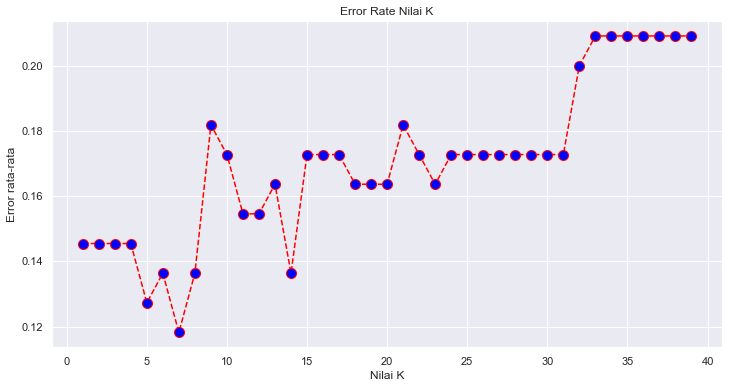

In [52]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')